In [1]:
%matplotlib inline
%load_ext rmagic
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4

Automatically created module for IPython interactive environment


/home/sofia/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [2]:
file='./cf/20090527/cfrad.20090527_145347.000_to_20090527_145735.000_INTA_Par_v1_SUR.nc'
radar=pyart.io.read_cfradial(file)

In [25]:
#datos para cada elevacion#
#ZDR
ZDR=radar.fields['ZDR']['data']
zdr=[]
for i in range(radar.nsweeps):
    zdr.append(ZDR[360*i+i:360*(i+1)+i])  

#RhoHV
RhoHV=radar.fields['RhoHV']['data']
rhohv=[]
for i in range(radar.nsweeps):
    rhohv.append(RhoHV[360*i+i:360*(i+1)+i])  

#V
V=radar.fields['V']['data']
v=[]
for i in range(radar.nsweeps):
    v.append(V[360*i+i:360*(i+1)+i])  
    
#dBZ
V=radar.fields['dBZ']['data']
dbz=[]
for i in range(radar.nsweeps):
    dbz.append(V[360*i+i:360*(i+1)+i])      


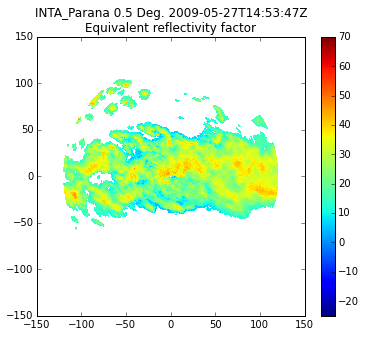

In [14]:
##Grafico ppi de los datos PPI de la primera elevacion
xlims=[-150,150]
ylims=[-150,150]

tilt=0  #elevacion??
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))
display.plot_ppi('dBZ', tilt,
                 colorbar_label='',
                 axislabels_flag=False,vmin=-25,vmax=70)
display.set_limits(xlims,ylims)
plt.show()

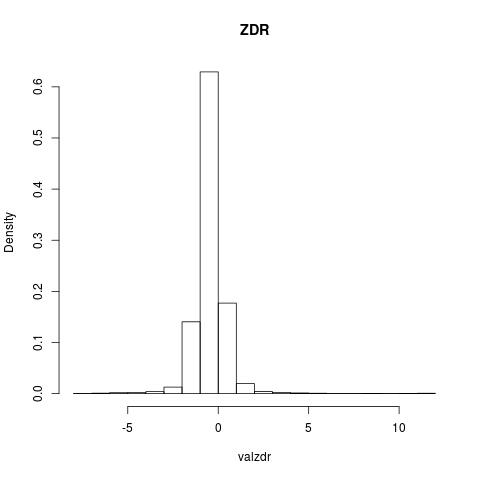

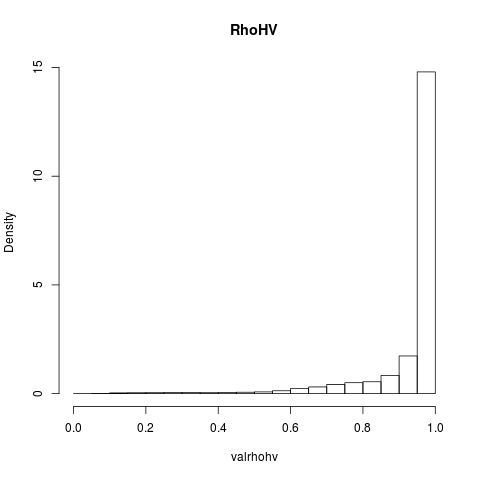

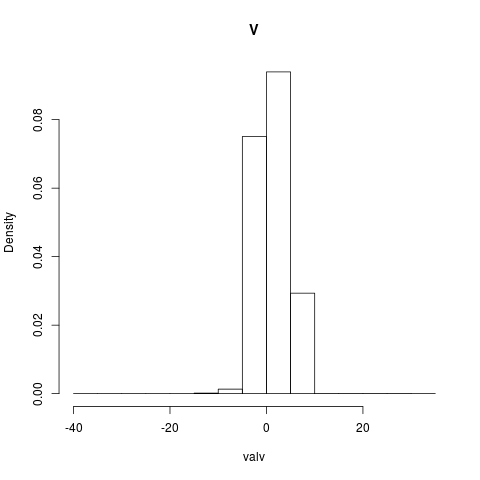

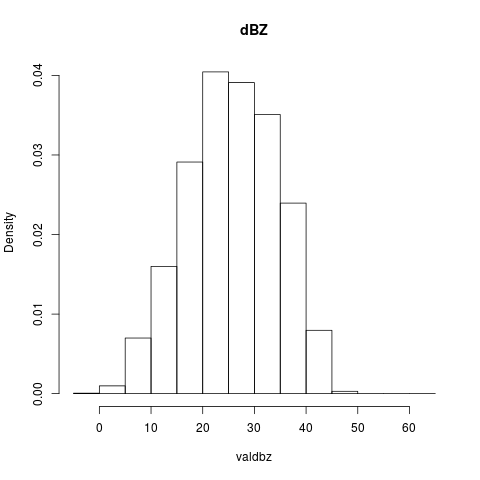

<ListVector - Python:0x7f32ff928ea8 / R:0x94e2b20>
[Float..., IntVe..., Float..., Float..., StrVe..., Vector]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7f32ff928950 / R:0x6091ff0>
[-5.000000, 0.000000, 5.000000, ..., 55.000000, 60.000000, 65.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x7f32ff928e18 / R:0x59bfe68>
[      33,      502,     3583, ...,        1,        1,        1]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7f32ff928b48 / R:0x60921e8>
[0.000064, 0.000979, 0.006991, ..., 0.000002, 0.000002, 0.000002]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7f32ff9285a8 / R:0x6092338>
[-2.500000, 2.500000, 7.500000, ..., 52.500000, 57.500000, 62.500000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x7f32ff928560 / R:0x59bd2e8>
[str]
  equidist: <class 'rpy2.robjects.vectors.Vector'>
  <Vector - Python:0x7f32ff928e

In [33]:
############################prueba con R#################################

import rpy2.robjects as robjects
#analizamos la primera elevacion
##miramos solo lo elementos FALSE de las mascaras 
valzdr=zdr[0][~zdr[0].mask].data 
valrhohv=rhohv[0][~rhohv[0].mask].data 
valv=v[0][~v[0].mask].data
valdbz=dbz[0][~dbz[0].mask].data
%R -i valzdr,valrhohv
%R -i valv,valdbz
#%R library(ggplot2)
%R par(mfrow= c(1,4))
%R hist(valzdr,freq=FALSE,main="ZDR")[0]
%R hist(valrhohv,freq=FALSE,main="RhoHV")[0]
%R hist(valv, freq=FALSE,main="V")[0]
%R hist(valdbz, freq=FALSE,main="dBZ")[0]

##histogramas de como se comportan las variables en todos los pixels que escanea el radar



In [ ]:
##seleccion de elementos y armado de una nueva mascara
##Futuro: elementos seleccionadps GRC/AP

#supongamos que quiero enmascarar los valores de dbz que sean mayores a 50 //el maximo esta en 62
#Nos quedamos con los que son mayores  a 50

